In [5]:
import cv2
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Grundlegende Kenngrößen eines digitalen Bildes

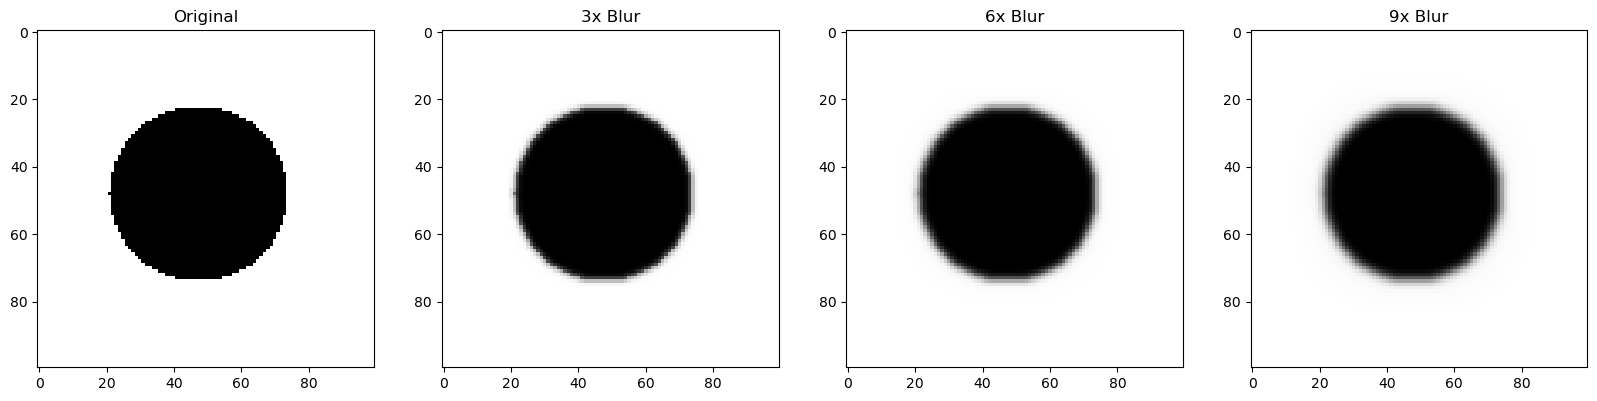

In [6]:
# ToDo: Untersuchen wie sich Mittelwert und Varianz verändert wenn das Blurrr erhöht wird
img_circle1 = cv.imread('./img/circle_0.bmp', cv.IMREAD_GRAYSCALE)
img_circle2 = cv.imread('./img/circle_3.bmp', cv.IMREAD_GRAYSCALE)
img_circle3 = cv.imread('./img/circle_6.bmp', cv.IMREAD_GRAYSCALE)
img_circle4 = cv.imread('./img/circle_9.bmp', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.imshow(img_circle1, cmap='gray')
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(img_circle2, cmap='gray')
plt.title('3x Blur')
plt.subplot(1,4,3)
plt.imshow(img_circle3, cmap='gray')
plt.title('6x Blur')
plt.subplot(1,4,4)
plt.imshow(img_circle4, cmap='gray')
plt.title('9x Blur')
plt.show()

In [28]:
# Todo: Funktion zur Berechnung des Mittelwertes eines Bildes img
def calc_mean(img): 
    w = len(img[0])
    h = len(img)

    summe = 0.0
    for reihe in range(h):
        for pixel in range(w):
            summe += img[reihe, pixel]
    return (summe/(w*h))

In [29]:
# Berechne Mittelwert für alle Bilder
mean = [calc_mean(img_circle1), calc_mean(img_circle2), calc_mean(img_circle3), calc_mean(img_circle4)]
mean = np.round(mean, 2)
print('Mittelwerte der 4 Bilder: ', mean)

Mittelwerte der 4 Bilder:  [200.3  200.19 199.92 199.51]


In [38]:
# Funktion zur Berechnung der Varianz eines Bildes img mit gegebenem Mittelwert mean
def calc_var(img, mean): 
    w = len(img[0])
    h = len(img)

    summe = 0.0
    # ToDo: Implementieren Sie die Varianzberechnung hier
    for reihe in range(h):
        for pixel in range(w):
            summe += (img[reihe, pixel] - mean) ** 2
    return np.sqrt(summe/(w*h))

In [39]:
# Berechne Varianz für alle Bilder
var = [calc_var(img_circle1, mean[0]), calc_var(img_circle2, mean[1]), 
       calc_var(img_circle3, mean[2]), calc_var(img_circle4, mean[3])]
var = np.round(var, 2)
print('Varianz der 4 Bilder: ', var)

Varianz der 4 Bilder:  [104.67 102.34 101.27 100.45]


Dieser Varianzvergleich wird auch beim kontrastbestimmten Autofokus verwendet. Hierbei gilt die Annahme, dass ein Bild genau dann am schärfsten ist, wenn seine Varianz am höchsten ist. Dies führt in diesem Beispiel dazu, dass Bild 1 gewählt worden wäre.

## Ergebnis
Der Mittelwert und die Varianz verringern sich desto höher der Blur.

- Mittelwert reduziert sich, weil ein Unschärfe-Filter die Pixelwerte in einem bestimmten Bereich kombiniert werden, um einen neuen Pixelwert zu erzeugen. Da helle und dunkle Pixel im Mittelwert dichter beieinander liegen, werden diese gemittelt und die Helligkeit des Bildes insgesamt verringert sich.

- Varianz verringert sich, weil die Unterschiede zwischen den Pixelwerten in einem bestimmten Bereich verringert werden, indem sie durch den Mittelwert ersetzt werden. Dadurch werden die Pixelwerte homogener, und die Varianz nimmt ab, da die Abweichungen von diesem Mittelwert geringer werden.